In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal 
from scipy.interpolate import interp1d 
import IPython.display as ipd
import scipy.io.wavfile as wav

import librosa
import sklearn
import pyaudio
import wave

target = np.append(["English"]*90,["French"]*90)
target = np.append(target,["Japanese"]*90)
target = np.append(target,["German"]*90)

EnglishPks = np.array([[0]*13]*90)
FrenchPks = np.array([[0]*13]*90)
JapanesePks = np.array([[0]*13]*90)
GermanPks = np.array([[0]*13]*90)

with open("EnglishPeaks30.txt",'r') as file:
    data = file.read().replace('\n', ' ')
    data = data.replace('  ',' ')
    data = data.split()
    for i in np.arange(90):
        for j in np.arange(13):
            EnglishPks[i][j] = int(data[i*13+j])
with open("FrenchPeaks30.txt",'r') as file:
    data = file.read().replace('\n', ' ')
    data = data.replace('  ',' ')
    data = data.split()
    for i in np.arange(90):
        for j in np.arange(13):
            FrenchPks[i][j] = int(data[i*13+j])
with open("JapanesePeaks30.txt",'r') as file:
    data = file.read().replace('\n', ' ')
    data = data.replace('  ',' ')
    data = data.split()
    for i in np.arange(90):
        for j in np.arange(13):
            JapanesePks[i][j] = int(data[i*13+j])
with open("GermanPeaks30.txt",'r') as file:
    data = file.read().replace('\n', ' ')
    data = data.replace('  ',' ')
    data = data.split()
    for i in np.arange(90):
        for j in np.arange(13):
            GermanPks[i][j] = int(data[i*13+j])

'''
longtarget = np.append(["English"]*900,["French"]*900)
longtarget = np.append(longtarget,["Japanese"]*900)
longtarget = np.append(longtarget,["German"]*900)

allNormalMean = np.append(np.append(normalEnglishMean,normalFrenchMean),np.append(normalJapaneseMean,normalGermanMean))
allNormalStd = np.append(np.append(normalEnglishStd,normalFrenchStd),np.append(normalJapaneseStd,normalGermanStd))
allVeMean = np.append(np.append(veEnglishMean,veFrenchMean),np.append(veJapaneseMean,veGermanMean))
allVeStd = np.append(np.append(veEnglishStd,veFrenchStd),np.append(veJapaneseStd,veGermanStd))
'''

allPks = np.append(np.append(EnglishPks,FrenchPks,axis=0),np.append(JapanesePks,GermanPks,axis=0),axis=0)

In [2]:
def readInLiveAudio():
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 44100
    RECORD_SECONDS = 30
    WAVE_OUTPUT_FILENAME = "output.wav"
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)
    print("* recording")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print("* done recording")
    stream.stop_stream()
    stream.close()
    p.terminate()
    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

In [6]:
def betterVocalExtract(song):
    #song = '"'+song+'"'
    #command = "spleeter separate -i "+ song + " -p spleeter:2stems -o output"
    print("Start Command")
    !spleeter separate -i output.wav -p spleeter:2stems -o output
    print("Finished Command")

In [7]:
def bandComparison(song):
    n = 10
    filtertrain = [[0.0]]*13
    filtertrain[0] = signal.butter(n, [3000,4000], 'bandpass', fs=44100, output='sos')
    filtertrain[1] = signal.butter(n, [4000,5000], 'bandpass', fs=44100, output='sos')
    filtertrain[2] = signal.butter(n, [5000,6000], 'bandpass', fs=44100, output='sos')
    filtertrain[3] = signal.butter(n, [6000,7000], 'bandpass', fs=44100, output='sos')
    filtertrain[4] = signal.butter(n, [7000,8000], 'bandpass', fs=44100, output='sos')
    filtertrain[5] = signal.butter(n, [8000,9000], 'bandpass', fs=44100, output='sos')
    filtertrain[6] = signal.butter(n, [9000,10000], 'bandpass', fs=44100, output='sos')
    filtertrain[7] = signal.butter(n, [10000,11000], 'bandpass', fs=44100, output='sos')
    filtertrain[8] = signal.butter(n, [11000,12000], 'bandpass', fs=44100, output='sos')
    filtertrain[9] = signal.butter(n, [12000,13000], 'bandpass', fs=44100, output='sos')
    filtertrain[10] = signal.butter(n, [13000,14000], 'bandpass', fs=44100, output='sos')
    filtertrain[11] = signal.butter(n, [14000,15000], 'bandpass', fs=44100, output='sos')
    filtertrain[12] = signal.butter(n, 15000, 'highpass', fs=44100, output='sos')
    heightVar = 0.375
    distanceVar = 4000
    occurenceMatrix = [[0]*len(filtertrain)]*1
    for i in range(0,1):
        y, sr = librosa.load(song)
        for j in np.arange(len(filtertrain)):
            filtered = signal.sosfilt(filtertrain[j], y)
            ypeaks = signal.find_peaks(filtered, height=np.max(filtered)*heightVar, distance=distanceVar)
            occurenceMatrix[i][j] = len(ypeaks[0])                
    return occurenceMatrix  

In [8]:
print(allPks)
print(len(allPks))

[[25 17 20 ...  5  8  8]
 [13  4 13 ...  7  7  5]
 [37 45 28 ...  6  5  6]
 ...
 [ 9  8  4 ...  5  6  8]
 [ 4  3  3 ...  1  2  1]
 [11 17  6 ...  5  7 10]]
360


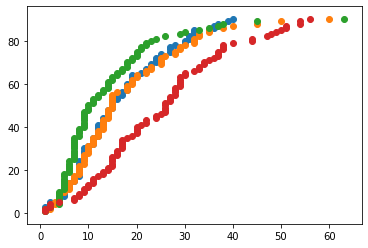

In [9]:
English13 = [0]*90
French13 = [0]*90
Japanese13 = [0]*90
German13 = [0]*90

bandnum = 13

for i in np.arange(90):
    English13[i] = EnglishPks[i][bandnum-1]
    French13[i] = FrenchPks[i][bandnum-1]
    Japanese13[i] = JapanesePks[i][bandnum-1]
    German13[i] = GermanPks[i][bandnum-1]

English13 = np.sort(English13)
French13 = np.sort(French13)
Japanese13 = np.sort(Japanese13)
German13 = np.sort(German13)

EnglishTarget = [4]*90
FrenchTarget = [3]*90
JapaneseTarget = [2]*90
GermanTarget = [1]*90
yaxis90 = np.arange(90)+1

plt.scatter(English13,yaxis90)
plt.scatter(French13,yaxis90)
plt.scatter(Japanese13,yaxis90)
plt.scatter(German13,yaxis90)

In [10]:
bands = np.array([[[0]*90]*4]*13)

for i in np.arange(13):
    for j in np.arange(90):
        bands[i][0][j] = EnglishPks[j][i]
        bands[i][1][j] = FrenchPks[j][i]
        bands[i][2][j] = JapanesePks[j][i]
        bands[i][3][j] = GermanPks[j][i]
    for j in np.arange(4):
        bands[i][j] = np.sort(bands[i][j])
    
def findPercentile(bnum, lnum, index):
    locs = np.where(bands[bnum][lnum]==index)[0]
    if len(locs) > 0:
        return int(np.max(locs)+1)
    elif index == 0:
        return 0
    else:
        return findPercentile(bnum,lnum,index-1)

def predictor(arr, printStuff, printMatrix, printPredictions):
    if len(arr) < 13:
        print("Incompatible array size.")
    else:
        bmatrix = np.array([[0]*4]*13)
        for i in np.arange(13):
            for j in np.arange(4):
                outof90 = int(findPercentile(i, j, arr[i]))
                #print(type(outof90))
                bmatrix[i][j] = abs(outof90 - int(90 - outof90))
    bmatrix = bmatrix//2
    predictions = np.array([0]*4)
    for i in np.arange(13):
        for j in np.arange(4):
            predictions[j] = predictions[j] + bmatrix[i][j]
    if printStuff > 0:
        print("This was predicted as:")
        if predictions[0] == np.min(predictions):
            print("\tEnglish")
        if predictions[1] == np.min(predictions):
            print("\tFrench")
        if predictions[2] == np.min(predictions):
            print("\tJapanese")
        if predictions[3] == np.min(predictions):
            print("\tGerman")
    if printMatrix > 0:
        print(bmatrix)
    if printPredictions > 0:
        print(predictions)
    if predictions[0] == np.min(predictions):
            return 0
    elif predictions[1] == np.min(predictions):
            return 1
    elif predictions[2] == np.min(predictions):
            return 2
    elif predictions[3] == np.min(predictions):
            return 3

[[32  8 21 29]
 [27 15 17 31]
 [23  3 46 18]
 [17  8 14 51]]


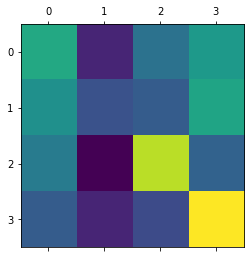

In [11]:
finalMatrix = np.array([[0]*4]*4)

for i in np.arange(90):
    a = predictor(EnglishPks[i],0,0,0)
    finalMatrix[0][a] = finalMatrix[0][a] + 1
    a = predictor(FrenchPks[i],0,0,0)
    finalMatrix[1][a] = finalMatrix[1][a] + 1
    a = predictor(JapanesePks[i],0,0,0)
    finalMatrix[2][a] = finalMatrix[2][a] + 1
    a = predictor(GermanPks[i],0,0,0)
    finalMatrix[3][a] = finalMatrix[3][a] + 1
    
print(finalMatrix)

plt.matshow(finalMatrix)


This was predicted as:
	French
[194 175 250 190]


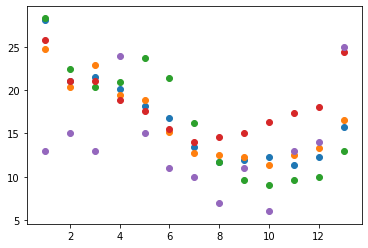

In [23]:
EnglishSums = np.array([2531, 1894, 1942, 1816, 1638, 1510, 1211, 1050, 1069, 1110, 1017, 1100, 1420])/90
FrenchSums = np.array([2233, 1830, 2065, 1753, 1698, 1364, 1150, 1130, 1104, 1022, 1131, 1199, 1494])/90
GermanSums = np.array([2318, 1899, 1898, 1693, 1587, 1395, 1265, 1312, 1359, 1464, 1565, 1628, 2200])/90
JapaneseSums = np.array([2546, 2021, 1838, 1886, 2132, 1930, 1454, 1056, 866, 815, 864, 897, 1163])/90
xaxis13 = np.arange(13)+1




#readInLiveAudio()
#betterVocalExtract('output.wav')
#occurenceMatrix = bandComparison("/home/russell/SingIT/output/('output', '.wav')/vocals.wav")
#inputarr = occurenceMatrix[0]
print()

# inputarr is where you put the numbers you want to test for a single song.
inputarr = np.array([13, 15, 13, 24, 15, 11, 10, 7, 11, 6, 13, 14, 25])
predictor(inputarr,1,0,1)
plt.scatter(xaxis13,EnglishSums) # Blue
plt.scatter(xaxis13,FrenchSums) # Orange
plt.scatter(xaxis13,JapaneseSums) # Green
plt.scatter(xaxis13,GermanSums) # Red
plt.scatter(xaxis13,inputarr) # Purple
#plt.figure()
#plt.scatter(xaxis13,EnglishSums)
#plt.scatter(xaxis13,FrenchSums)
#plt.figure()
#plt.scatter(xaxis13,EnglishSums)
#plt.scatter(xaxis13,JapaneseSums)

In [ ]:
# EVERYTHING BEYOND THIS POINT IS GARBAGE

In [42]:
marginarr = [0.0]*13
for i in np.arange(13):
    vals = [EnglishSums[i],FrenchSums[i],JapaneseSums[i],GermanSums[i]]
    marginarr[i] = np.max(vals) - np.min(vals)
#print(marginarr)
    
inputarr = np.array([19, 14, 8, 6, 8, 15, 3, 21, 11, 22, 12, 21, 9])
compmatrix = np.array([[0.0]*13]*4)

for i in np.arange(13):
    compmatrix[0][i] = abs(inputarr[i] - EnglishSums[i])
    compmatrix[1][i] = abs(inputarr[i] - FrenchSums[i])
    compmatrix[2][i] = abs(inputarr[i] - JapaneseSums[i])
    compmatrix[3][i] = abs(inputarr[i] - GermanSums[i])
#print(compmatrix)

for i in np.arange(13):
    vals = [compmatrix[0][i],compmatrix[1][i],compmatrix[2][i],compmatrix[3][i]]
    if np.min(vals) == compmatrix[0][i]:
        print("Band "+str(i+1)+": "+"English, "+str(100*(compmatrix[0][i]/marginarr[i]))+"% distance.")
    elif np.min(vals) == compmatrix[1][i]:
        print("Band "+str(i+1)+": "+"French, "+str(100*(compmatrix[1][i]/marginarr[i]))+"% distance.")
    elif np.min(vals) == compmatrix[2][i]:
        print("Band "+str(i+1)+": "+"Japanese, "+str(100*(compmatrix[2][i]/marginarr[i]))+"% distance.")
    else:
        print("Band "+str(i+1)+": "+"German, "+str(100*(compmatrix[3][i]/marginarr[i]))+"% distance.")

Band 1: French, 167.09265175718846% distance.
Band 2: French, 298.4293193717275% distance.
Band 3: Japanese, 492.511013215859% distance.
Band 4: German, 597.4093264248701% distance.
Band 5: German, 159.08256880733938% distance.
Band 6: French, 2.473498233215539% distance.
Band 7: French, 289.47368421052647% distance.
Band 8: German, 220.61068702290078% distance.
Band 9: English, 16.02434077079108% distance.
Band 10: German, 79.5069337442219% distance.
Band 11: French, 7.2753209700427925% distance.
Band 12: German, 35.84131326949385% distance.
Band 13: Japanese, 34.040501446480235% distance.


In [5]:
def printpredict(prediction, target):
    for i in np.arange(len(prediction)):
        print(str(i+1)+". "+target[i]+" predicted as "+prediction[i])

In [6]:
def lang2num(lang):
    if lang == "English":
        return 0
    elif lang == "French":
        return 1
    elif lang == "Japanese":
        return 2
    elif lang == "German":
        return 3
    else:
        return -1

In [7]:
def predictmatrix(prediction, target):
    matrix = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    for i in np.arange(len(prediction)):
        a = lang2num(target[i])
        b = lang2num(prediction[i])
        matrix[a][b] += 1
    return matrix

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.datasets import load_digits

'''

targetjg = np.append(["Japanese"]*90,["German"]*90)
jgNormalMean = np.append(normalJapaneseMean,normalGermanMean)

meanpredict = []
meanscore = 0
kf = KFold(n_splits=18)
for train, test in kf.split(jgNormalMean):
    xtrain = jgNormalMean[train].reshape(-1, 1)
    xtest = jgNormalMean[test].reshape(-1, 1)
    ytrain = targetjg[train]
    ytest = targetjg[test]
    clf = svm.SVC(kernel='linear', C=1).fit(xtrain, ytrain)
    meanpredict = np.append(meanpredict, clf.predict(xtest))
    meanscore = meanscore + clf.score(xtest, ytest)/18.0
    print(clf.score(xtest, ytest))
meanscore = meanscore * 100
print("Score for normal mean centroid: " + str(meanscore) + "%")

'''

'\n\ntargetjg = np.append(["Japanese"]*90,["German"]*90)\njgNormalMean = np.append(normalJapaneseMean,normalGermanMean)\n\nmeanpredict = []\nmeanscore = 0\nkf = KFold(n_splits=18)\nfor train, test in kf.split(jgNormalMean):\n    xtrain = jgNormalMean[train].reshape(-1, 1)\n    xtest = jgNormalMean[test].reshape(-1, 1)\n    ytrain = targetjg[train]\n    ytest = targetjg[test]\n    clf = svm.SVC(kernel=\'linear\', C=1).fit(xtrain, ytrain)\n    meanpredict = np.append(meanpredict, clf.predict(xtest))\n    meanscore = meanscore + clf.score(xtest, ytest)/18.0\n    print(clf.score(xtest, ytest))\nmeanscore = meanscore * 100\nprint("Score for normal mean centroid: " + str(meanscore) + "%")\n\n'

In [9]:
#print(meanpredict)

In [31]:
meanpredict = []
meanscore = 0

print(allPks)

splits = 18
kf = KFold(n_splits=splits)
for train, test in kf.split(allPks):
    print(len(train),len(test))
    xtrain = allPks[train].reshape(-1, 1)
    xtest = allPks[test].reshape(-1, 1)
    ytrain = target[train]
    ytest = target[test]
    clf = svm.SVC(kernel='poly', C=1).fit(xtrain, ytrain)
    meanpredict = np.append(meanpredict, clf.predict(xtest))
    meanscore = meanscore + clf.score(xtest, ytest)/splits
    print(clf.score(xtest, ytest) * 100)
meanscore = meanscore * 100
print("Score for silibant detection: " + str(meanscore) + "%")

[[25 17 20 ...  5  8  8]
 [13  4 13 ...  7  7  5]
 [37 45 28 ...  6  5  6]
 ...
 [ 9  8  4 ...  5  6  8]
 [ 4  3  3 ...  1  2  1]
 [11 17  6 ...  5  7 10]]
340 20


ValueError: Found input variables with inconsistent numbers of samples: [4420, 340]

[[0, 659, 92, 149], [155, 0, 173, 572], [82, 744, 0, 74], [46, 786, 68, 0]]


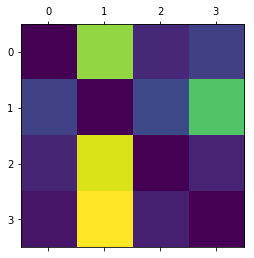

In [26]:
#printpredict(meanpredict,target)
print(predictmatrix(meanpredict,longtarget))
plt.matshow(predictmatrix(meanpredict,longtarget))